## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

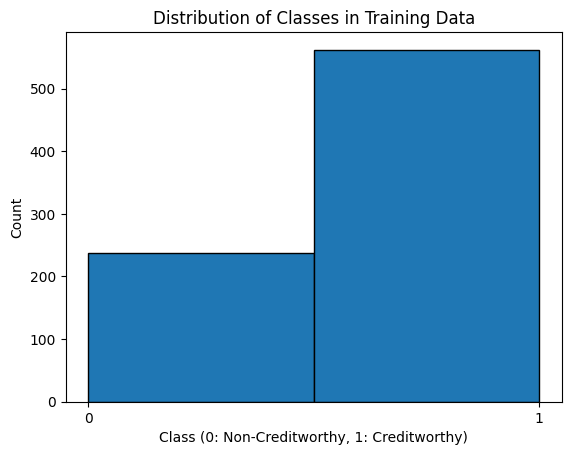

In [4]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

0.8043478260869565


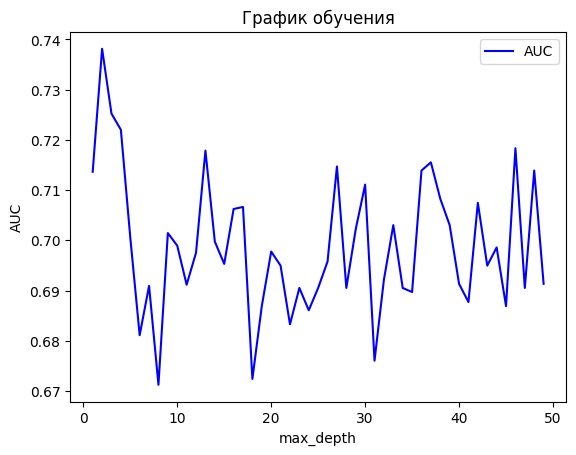

2


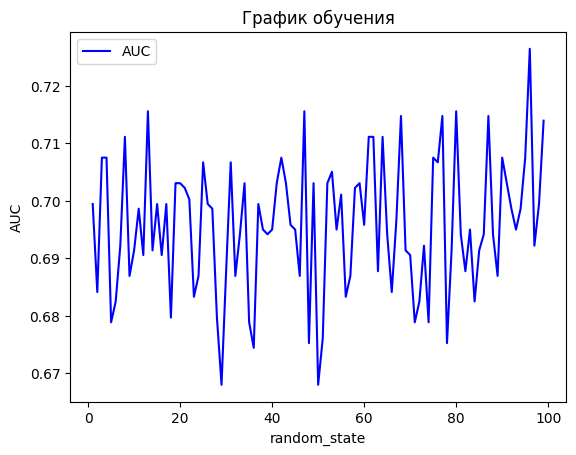

96


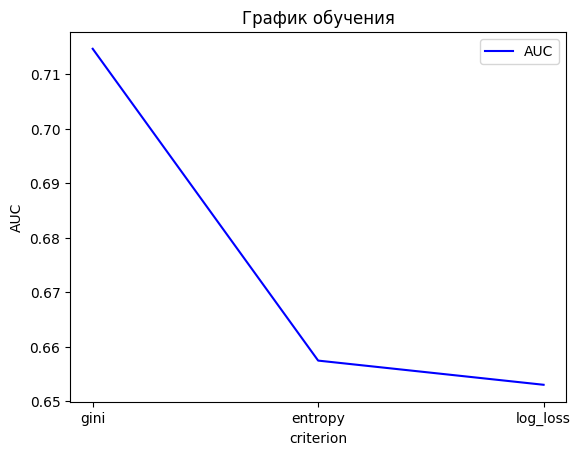

gini


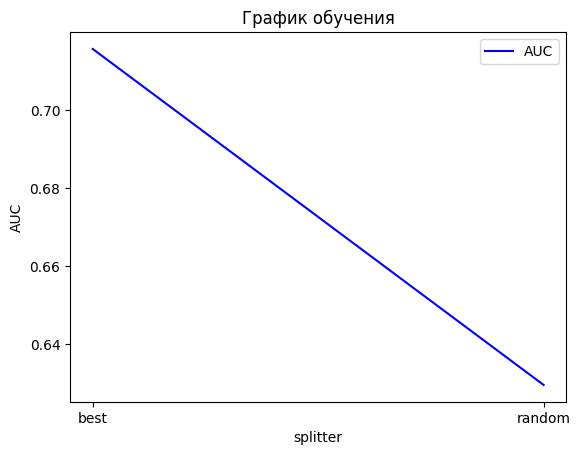

best


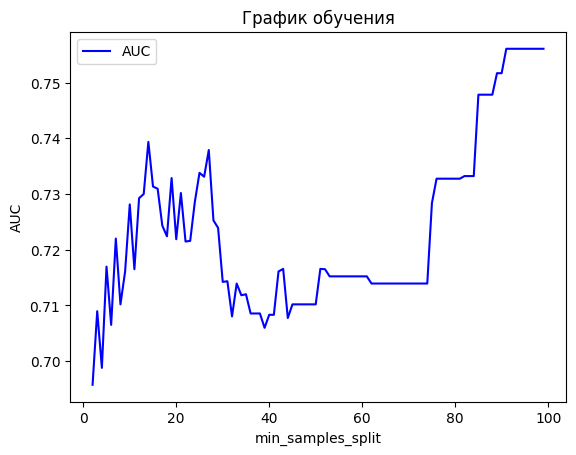

91


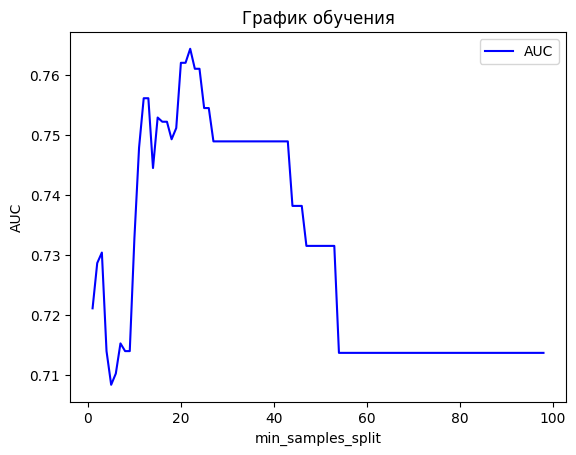

22


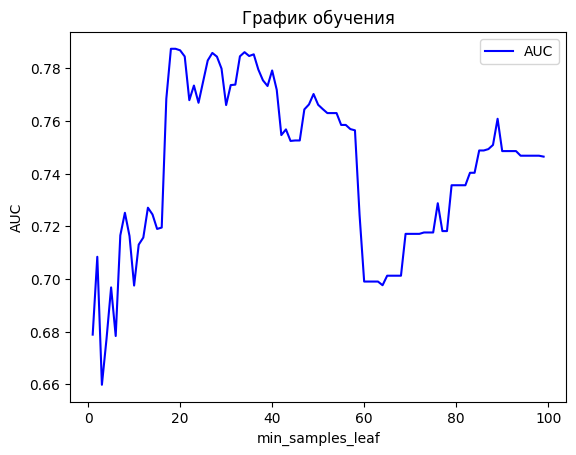

18


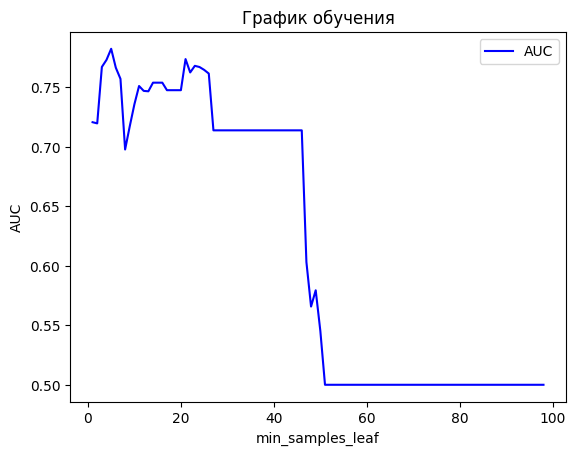

5


In [27]:
decision_tree_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=18,  min_samples_split=91) #глуина древа 
decision_tree_model.fit(X_train, y_train)
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
print(roc_auc_decision_tree)

history = []
max = 0
max_i = 0
# max_depth=i, random_state=42, min_samples_split=0.22 = 0.764  , min_samples_split=0.22
for i in range(1, 50):
    decision_tree_model = DecisionTreeClassifier(max_depth=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i
    history.append(roc_auc_decision_tree)

plt.plot(range(1, 50), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
for i in range(1, 100):
    decision_tree_model = DecisionTreeClassifier(random_state=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(range(1, 100), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('random_state')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
A = ['gini', 'entropy', 'log_loss']
for i in A:
    decision_tree_model = DecisionTreeClassifier(criterion=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(A, history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('criterion')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
A = ['best', 'random']
for i in A:
    decision_tree_model = DecisionTreeClassifier(splitter=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(A, history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('splitter')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
for i in range(2, 100):
    decision_tree_model = DecisionTreeClassifier(min_samples_split=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(range(2, 100), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('min_samples_split')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
for i in range(1, 99):
    decision_tree_model = DecisionTreeClassifier(min_samples_split=i/100) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(range(1, 99), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('min_samples_split')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
for i in range(1, 100):
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=i) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(range(1, 100), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)

history=[]
max = 0
max_i = 0
for i in range(1, 99):
    decision_tree_model = DecisionTreeClassifier(min_samples_leaf=i/100) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    if max < roc_auc_decision_tree:
        max = roc_auc_decision_tree
        max_i = i

plt.plot(range(1, 99), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i)


0.6129032258064516


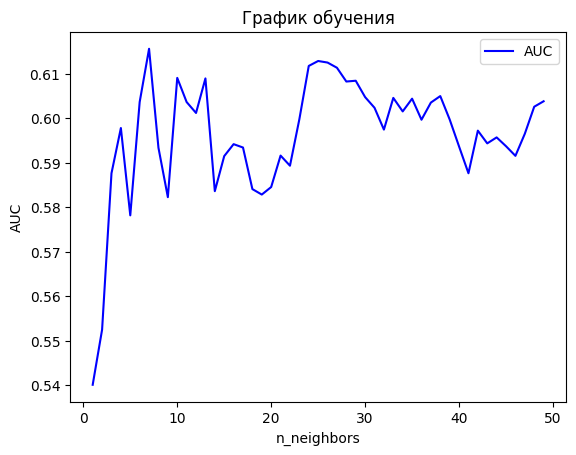

7 0.6156498363721364


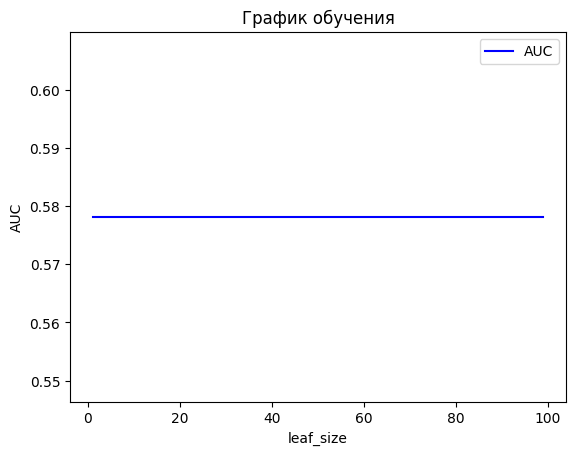

1 0.5781907433380085


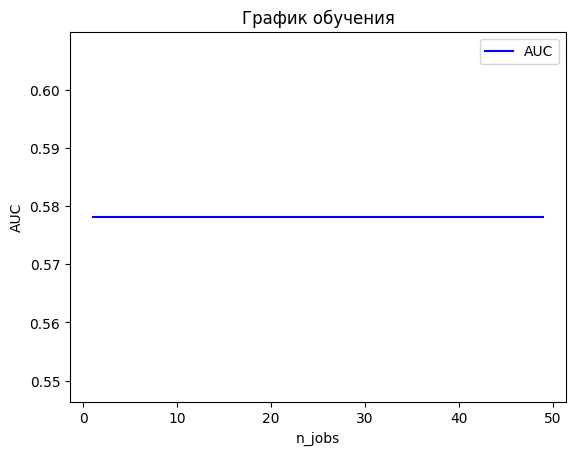

1 0.5781907433380085


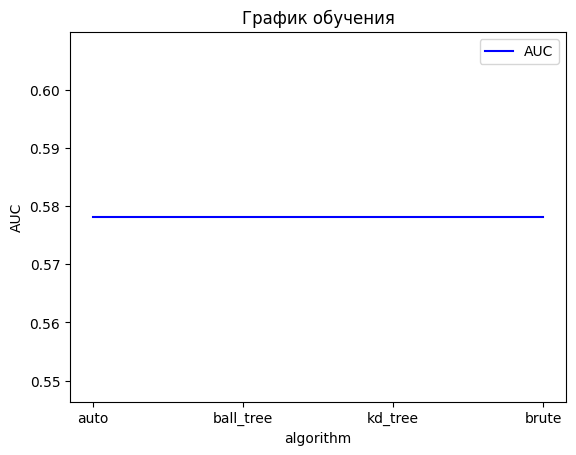

auto 0.5781907433380085


In [42]:
knn_model = KNeighborsClassifier(n_neighbors=25) #p=1 мфнхэттенское расстояние около 0.65
knn_model.fit(X_train, y_train)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(roc_auc_knn)

history=[]
max = 0
max_i = 0
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    if max < roc_auc_knn:
        max = roc_auc_knn
        max_i = i
plt.plot(range(1, 50), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('n_neighbors')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i, max)

history=[]
max = 0
max_i = 0
for i in range(1, 100):
    knn_model = KNeighborsClassifier(leaf_size=i) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    if max < roc_auc_knn:
        max = roc_auc_knn
        max_i = i
plt.plot(range(1, 100), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('leaf_size')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i, max)

'''
history=[]
max = 0
max_i = 0
for i in range(1, 50):
    knn_model = KNeighborsClassifier(p=i) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    if max < roc_auc_knn:
        max = roc_auc_knn
        max_i = i
plt.plot(range(1, 50), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('p')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i, max)
'''

history=[]
max = 0
max_i = 0
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_jobs=i) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    if max < roc_auc_knn:
        max = roc_auc_knn
        max_i = i
plt.plot(range(1, 50), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('n_jobs')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i, max)

history=[]
max = 0
max_i = 0
A= ['auto', 'ball_tree', 'kd_tree', 'brute']
for i in A:
    knn_model = KNeighborsClassifier(algorithm=i) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    if max < roc_auc_knn:
        max = roc_auc_knn
        max_i = i
plt.plot(A, history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('algorithm')
plt.ylabel('AUC')
plt.legend()
plt.show()
print(max_i, max)

In [25]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(max_iter=180) #увеличивать чисол итераций 100 ->
logistic_regression_model.fit(X_train, y_train)

# Создание модели Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=18,  min_samples_split=91) #глуина древа 
decision_tree_model.fit(X_train, y_train)
history = []
'''
# max_depth=i, random_state=42, min_samples_split=0.22 = 0.764  , min_samples_split=0.22
for i in range(1, 50):
    decision_tree_model = DecisionTreeClassifier(max_depth=i, min_samples_split=0.22, random_state=42) #глуина древа 
    decision_tree_model.fit(X_train, y_train)
    # растет до 2 (0.73), затем уменьшается. Скачек у 7 и 9 (0.73)
    y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
    roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
    history.append(roc_auc_decision_tree)
    #print(i, f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
plt.plot(range(1, 50), history, 'b', label='MSE')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()

# Отобразите график.
plt.show()

decision_tree_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1) #глуина древа 
decision_tree_model.fit(X_train, y_train)
    # растет до 2 (0.73), затем уменьшается. Скачек у 7 и 9 (0.73)
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
print( f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
'''


# Создание модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=8, p=1, leaf_size=42) # кол-во рассматриваемых точек 
knn_model.fit(X_train, y_train)
''''
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i, p=1, leaf_size=42, n_jobs=3) #p=1 мфнхэттенское расстояние около 0.65
    knn_model.fit(X_train, y_train)
    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
    history.append(roc_auc_knn)
    #print(i, f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
plt.plot(range(1, 50), history, 'b', label='AUC')
plt.title('График обучения')
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.legend()
# Отобразите график.
plt.show()
'''


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


"'\nfor i in range(1, 50):\n    knn_model = KNeighborsClassifier(n_neighbors=i, p=1, leaf_size=42, n_jobs=3) #p=1 мфнхэттенское расстояние около 0.65\n    knn_model.fit(X_train, y_train)\n    y_prob_knn = knn_model.predict_proba(X_test)[:, 1]\n    roc_auc_knn = roc_auc_score(y_test, y_prob_knn)\n    history.append(roc_auc_knn)\n    #print(i, f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')\nplt.plot(range(1, 50), history, 'b', label='AUC')\nplt.title('График обучения')\nplt.xlabel('Эпохи')\nplt.ylabel('MSE')\nplt.legend()\n# Отобразите график.\nplt.show()\n"

In [26]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print('Доля верных')
print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}\n')

print('площадь под ROC-кривой, Чем ближе AUC к 1, тем лучше модель различает классы.')
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}\n')

print('Точность положительных предсказаний')
print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}\n')

print('Полнота, или Чувствительность')
print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

Доля верных
Accuracy of Logistic Regression: 0.72
Accuracy of Decision Tree: 0.775
Accuracy of K-Nearest Neighbors: 0.645

площадь под ROC-кривой, Чем ближе AUC к 1, тем лучше модель различает классы.
ROC AUC of Logistic Regression: 0.7903225806451614
ROC AUC of Decision Tree: 0.8043478260869565
ROC AUC of K-Nearest Neighbors: 0.621785881252922

Точность положительных предсказаний
Precision of Logistic Regression: 0.7469879518072289
Precision of Decision Tree: 0.7818181818181819
Precision of K-Nearest Neighbors: 0.703030303030303

Полнота, или Чувствительность
Recall of Logistic Regression: 0.8985507246376812
Recall of Decision Tree: 0.9347826086956522
Recall of K-Nearest Neighbors: 0.8405797101449275


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели